In [78]:
# model development setup import libaries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [79]:
# get data and create data frame 

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [80]:
#Linear Regression
#One example of a Data Model that we will be using is

#Simple Linear Regression.
#Simple Linear Regression is a method to help us understand the relationship between two variables:

#The predictor/independent variable (X)
#The response/dependent variable (that we want to predict)(Y)
#The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

#𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
#Linear function:
#𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
#a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
#b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [81]:
# load modules for linear regression 

from sklearn.linear_model import LinearRegression

In [82]:
# create linear regression object 

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
# how does "highway-mpg" predict car price 

x = df[['highway-mpg']]
y = df[['price']]

In [84]:
# fit the linear model using "highway-mpg"

lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
# output a perdiction 

Yhat = lm.predict(x)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [86]:
# what is the intercep (a)

lm.intercept_

array([38423.30585816])

In [87]:
# what is the slope (b)

lm.coef_

array([[-821.73337832]])

In [88]:
# let's try the model using highway-mpg

hmpg = 38
price = lm.intercept_ + lm.coef_ * hmpg
print(price)

[[7197.43748192]]


In [89]:
# New Linear Regression Object 

lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
# how does "engine-size" predict car price 

x = df[['engine-size']]
y = df[['price']]

lm2.fit(x,y)

Yhat = lm2.predict(x)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [91]:
# what is the intercep (a)

lm2.intercept_

array([-7963.33890628])

In [92]:
# what is the slope (b)

lm2.coef_

array([[166.86001569]])

In [93]:
# let's try the model using engine -size

engs = 90
price = lm2.intercept_ + lm2.coef_ * engs
print(price)

[[7054.06250595]]


In [94]:
# Multiple Linear Regression
# What if we want to predict car price using more than one variable?

# If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. 
# Multiple Linear Regression is very similar to Simple Linear Regression, 
# but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. 
# Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

# 𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑋2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑋3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑋4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
# 𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡𝑏1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑏2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑏3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑏4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
# The equation is given by

# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [95]:
# Create prdictor variable list 

z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [96]:
# fit the linear model using z list 

lm.fit(z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
# What is the value of the intercept(a)

lm.intercept_

-15806.624626329198

In [98]:
# what are the coeffcients of (b1,b2,b3,b4)

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [99]:
# What is the final estimated linear model that we get?
# As we saw above, we should get a final linear function with the structure:
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4 
# What is the linear function we get in this example?
# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.
# import the visualization package: seaborn

In [100]:
# import the visualization package: seaborn 

import seaborn as sns
%matplotlib inline

In [101]:
# When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

# This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. 
# This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48271.95831402308)

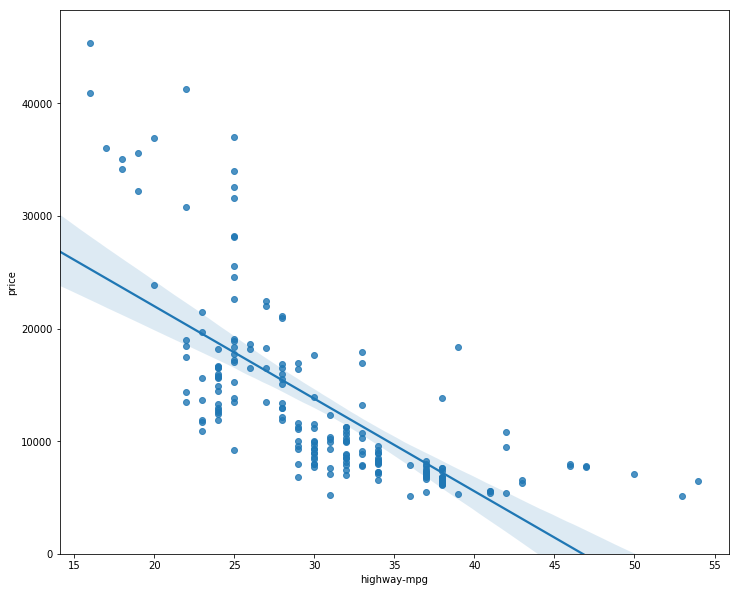

In [102]:
# visualize Horsepower as potential predictor variable of price:

width = 12 
height = 10 
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0)

(0, 47422.919330307624)

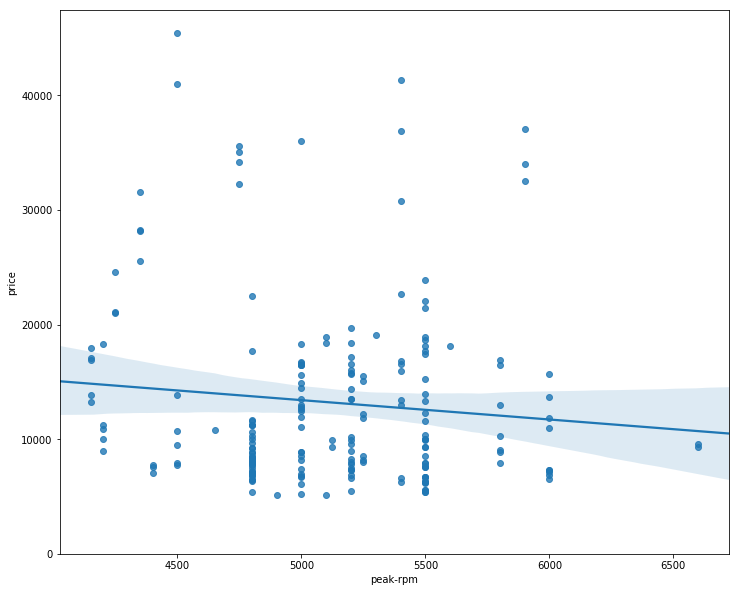

In [103]:
# visualize peak-rpm as potential predictor variable of price:

plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0)

In [104]:
# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

# What do we pay attention to when looking at a residual plot?

# We look at the spread of the residuals:

# If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. 
#Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

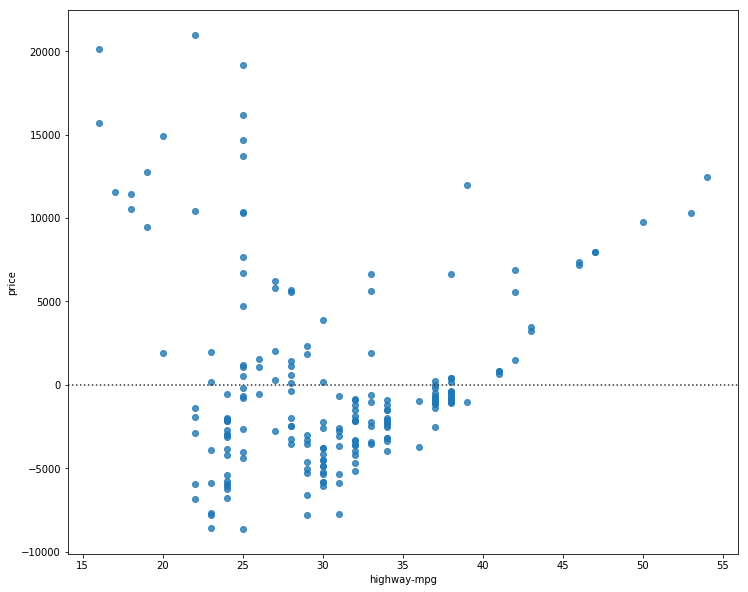

In [105]:
# visualize variance of data withresidual plot

width = 12 
height = 10 
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [106]:
# Multiple Linear Regression
# How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.
# One way to look at the fit of the model is by looking at the distribution plot: 
# We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.
# First lets make a prediction

In [107]:
# make prediction

Y_hat = lm.predict(z)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


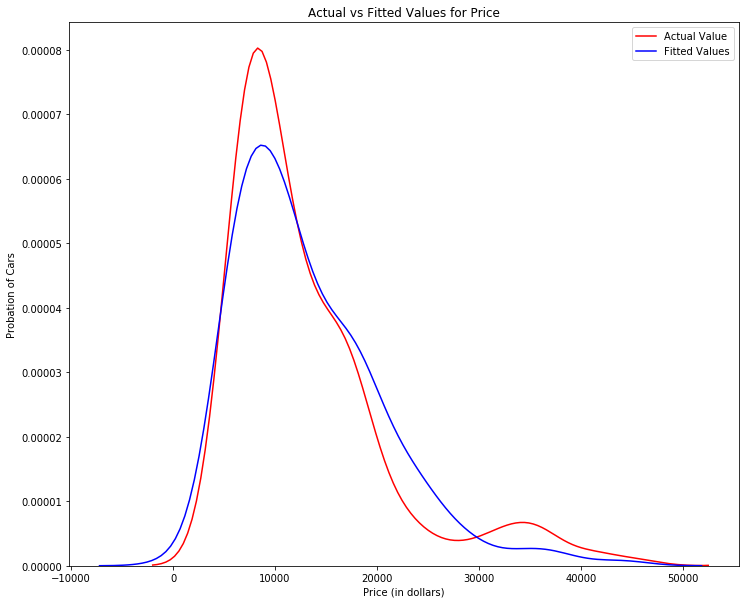

In [108]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Y_hat, hist=False, color='b', label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Probation of Cars')

plt.show()
plt.close()

In [109]:
# Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

# There are different orders of polynomial regression:

# Quadratic - 2nd order
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2
 
# Cubic - 3rd order
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3
# Higher order:
# 𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3....
# We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

# We will use the following function to plot the data:

In [110]:
# Create plot polly function

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [111]:
# Get variables 

x = df['highway-mpg']
y = df['price']

In [112]:
# fit suing function polyfit() and poly1d to desplay polynomial function. polynomial of the 3rd order (cubic)

f = np.polyfit(x, y , 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


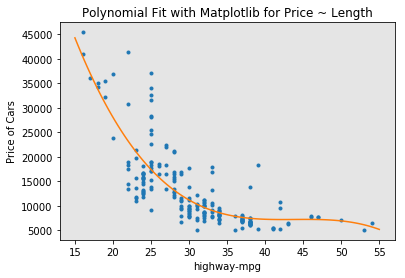

In [113]:
# plot the function 

PlotPolly(p, x, y, 'highway-mpg')

In [114]:
# The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by
# 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22
# We can perform a polynomial transform on multiple features. First, we import the module

In [115]:
# perform polynomial transform on mulitiple features

from sklearn.preprocessing import PolynomialFeatures

In [116]:
# create a PolynomialFeatures onject of degree 2

pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [117]:
# fit the object 

Z_pre = pr.fit_transform(z)

In [118]:
# original data is of 201 samples and 4 features

z.shape

(201, 4)

In [119]:
# after transformation, 201 samples and 4 features

Z_pre.shape

(201, 15)

In [120]:
# Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [121]:
# We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [122]:
# input the list as an argument to the pipeline constructor

pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [123]:
# We can normalize the data, perform a transform and fit the model simultaneously.

pipe.fit(z,y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [124]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

ypipe = pipe.predict(z)
ypipe[0:4]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [125]:
# When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

# R^2 / R-squared
# Mean Squared Error (MSE)
# R-squared

# R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

# The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

# Mean Squared Error (MSE)

# The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [126]:
# Calculate the r^2 highway_mpg_fit 

lm.fit(z, y)
#find the r^2
print('The R-Square is: ', lm.score(z, y))

The R-Square is:  0.8093562806577457


In [127]:
# Predict yhat using the prdict method where x is the input

Yhat = lm.predict(z)
print('The output of the first four pridicted value is: ', Yhat[0:4])

The output of the first four pridicted value is:  [13699.11161184 13699.11161184 19051.65470233 10620.36193015]


In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price snd pridicted value is: ', mse)

The mean square error of price snd pridicted value is:  11980366.87072649


In [130]:
# use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [131]:
# create new input 

new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [132]:
# fit the modell 

lm.fit(z, y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
# produce a prediction

yhat = lm.predict(new_input)
yhat[0:5]

ValueError: shapes (99,1) and (4,) not aligned: 1 (dim 1) != 4 (dim 0)

In [ ]:
# Decision Making: Determining a Good Model Fit
# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

# When comparing models, the model with the higher R-squared value is a better fit for the data.
# What is a good MSE?
# When comparing models, the model with the smallest MSE value is a better fit for the data.

# Let's take a look at the values for the different models.
# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

# R-squared: 0.49659118843391759
# MSE: 3.16 x10^7
# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

# R-squared: 0.80896354913783497
# MSE: 1.2 x10^7
# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

# R-squared: 0.6741946663906514
# MSE: 2.05 x 10^7
# Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
# Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, 
# you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

# So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

# MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
# R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
# This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

# Simple Linear Model (SLR) vs Polynomial Fit
# MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
# R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
# Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

# Multiple Linear Regression (MLR) vs Polynomial Fit
# MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
# R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.